In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Dataset
dataset = pd.read_csv('Car_price_class.csv')
dataset.head()

,Brand,Force,Year,EngineV,Price_euro
0,Audi,3.58,2000,0.60,3800
1,BMW,4.59,2015,0.65,38888
2,Toyota,4.07,2016,1.00,11708
3,Toyota,4.02,2016,1.00,10500
4,Renault,4.10,2014,1.00,12650


In [5]:
#Selecting x
X = dataset.iloc[:, [0, 1, 2, 3, 4]].values  

In [6]:
# Transforming and scaling data
column_transformer = ColumnTransformer([
    ('brand_encoder', OneHotEncoder(), [0]),  # encoding<<<<<<<<<<<< brand is in the zero location
    ('scaler', StandardScaler(), [1, 2, 3, 4])  # scale
])

In [7]:
# Apply the transformations
X_transformed = column_transformer.fit_transform(X)

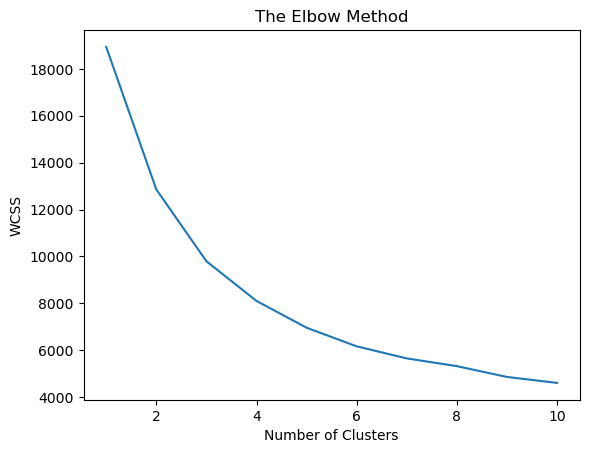

In [8]:
# Elbow method
wcss = []
for i in range(1, 11): #>>>>>>>>>>>>> we have jsut 7 brands, we dont need set too many
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Fit the K-Means model 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_transformed)         #>>>>>>>>>>>>>>X_transformed for the data

In [10]:
# Append the y
dataset['Cluster'] = y_kmeans

In [11]:
dataset.head()  #Observer to cluster columns set up

,Brand,Force,Year,EngineV,Price_euro,Cluster
0,Audi,3.58,2000,0.60,3800,0
1,BMW,4.59,2015,0.65,38888,3
2,Toyota,4.07,2016,1.00,11708,3
3,Toyota,4.02,2016,1.00,10500,3
4,Renault,4.10,2014,1.00,12650,3


In [12]:
#Classification
#select x and y
X_classification = dataset.iloc[:, 0:-1].values    #or can be named like for example x1, x2 etc
y_classification = dataset.iloc[:, -1].values 

In [13]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.25, random_state=0)

In [14]:
#Scaling and encoding because was not applied into the dataset the first Scale.

column_transformer_classification = ColumnTransformer([
    ('brand_encoder', OneHotEncoder(), [0]), 
    ('scaler', StandardScaler(), [1, 2, 3, 4])
])

In [15]:
# Apply the transformations to the training and test sets
X_train = column_transformer_classification.fit_transform(X_train)
X_test = column_transformer_classification.transform(X_test)

In [16]:
# Training the K-NN model                                         OR CAN BE USED Decision Tree or Random Forest
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)    #p=2 it means select 2 on side and 3 in another side 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [3 3]
 [1 1]
 ...
 [3 3]
 [3 3]
 [3 3]]


In [20]:
# Evaluating the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[247   2   0   5]
 [  1 240   1   3]
 [  0   1  37   0]
 [  5   7   0 452]]


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.975024975024975
